# 矩阵分解  
矩阵分解主要用于对矩阵进行特征提取，当矩阵为方阵时，可以用特征值分解；而矩阵不是方阵时，则可以进行奇异值分解  
**奇异值分解使用与任何矩阵，特征值分解只适用于方阵**  
## 奇异值分解(SVD)  
1. 矩阵分解

    1.1. 矩阵分解作用

    - 矩阵填充(通过矩阵分解来填充原有矩阵，例如协同过滤的ALS算法就是填充原有矩阵)

    - 清理异常值与离群点

    - 降维、压缩

    - 个性化推荐

    - 间接的特征组合(计算特征间相似度)
2. SVD具体介绍  
    2.1. 特征值、特征向量、特征值分解  
    特征值分解和奇异值分解在机器学习中都是很常见的矩阵分解算法。两者有着很紧密的关系，特征值分解和奇异值分解的目的都是一样，就是提取出一个矩阵最重要的特征。
    - 特征值、特征向量  
    如果一个向量v是矩阵A的特征向量，将一定可以表示成下面的形式：
    $$
    \large A\alpha =  \lambda\alpha
    $$
    其中，$\lambda$**是特征向量**$\alpha$对应的特征值，一个矩阵的一组特征向量是一组正交向量。  
    思考：为什么一个向量和一个数相乘的效果与一个矩阵和一个向量相乘的效果是一样的呢?  
    答案：矩阵A与向量v相乘，本质上是对向量v进行了一次线性变换（旋转或拉伸），而该变换的效果为常数λ乘以向量v。当我们求特征值与特征向量的时候，就是为了求矩阵A能使哪些向量（特征向量）只发生伸缩变换，而变换的程度可以用特征值λ表示。  
    - 特征值和特征向量的几何意义  
    一个矩阵其实就是一个线性变换，因为一个矩阵乘以一个向量后得到的向量，其实就相当于将这个向量进行了线性变换。比如说下面的这个矩阵：  
    $$
       M =  \left( \begin{array}{1}
        3 & 0 \\
        0 & 1
        \end{array}
        \right)
    $$
    它其实对应的线性变换是图的形式：  
    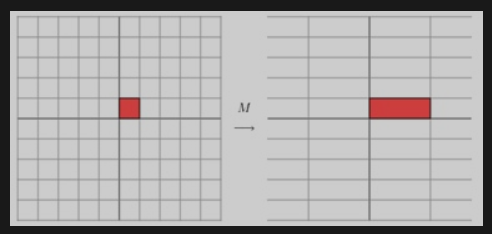  
    因为这个矩阵M乘以一个向量（x，y）的结果是：  
    $$
    \left[ \begin{array}{1} 3 & 0\\0 & 1 \end{array} \right] \left[ \begin{array}{1} x \\ y \end{array} \right] = 
    \left[ \begin{array}{1} 3x \\ y \end{array} \right]
    $$
    上面的矩阵是对称的，所以这个变换是一个对x、y轴的方向一个拉伸变换（每一个对角线上的元素将会对一个维度进行拉伸变换，当值大于1时是拉伸，当值小于1时是缩短），如图2所示。当矩阵不是对称的时候，假如说矩阵是下面的样子：  
    $$
       M =  \left( \begin{array}{1}
        1 & 1 \\
        0 & 1
        \end{array}
        \right)
    $$
    它所描述的变换是下面的样子：  
    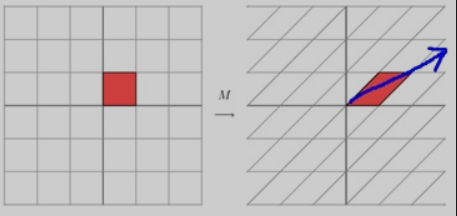  
    这其实是在平面上对一个轴进行的拉伸变换，如图3蓝色的箭头所示，蓝色的箭头是一个最主要的变换方向（变换的方向可能不止一个）。如果想要描述好一个变换，那我们就需要描述好这个变换主要的变化方向。  
    - 特征值分解  
    对于矩阵A，有一组特征向量v，将这组向量进行正交化单位化，就能得到一组正交单位向量。特征值分解，就是将矩阵A分解为如下式：  
    $$ A = Q\Sigma Q^{-1} $$
    其中，Q是矩阵A的特征向量组成的矩阵，$\Sigma$则是一个对角阵，对角线上的元素就是特征值。
    我们来分析一下特征值分解的式子，分解得到的Σ矩阵是一个对角矩阵，里面的特征值是由大到小排列的，这些特征值所对应的特征向量就是描述这个矩阵变换方向（从主要的变化到次要的变化排列）。  
    当矩阵是高维的情况下，那么这个矩阵就是高维空间下的一个线性变换，这个线性变换可能没法通过图片来表示，但是可以想象，这个变换也同样有很多的变化方向，我们通过特征值分解得到的前N个特征向量，就对应了这个矩阵最主要的N个变化方向。我们利用这前N个变化方向，就可以近似这个矩阵变换。也就是之前说的：提取这个矩阵最重要的特征。  
    总结：特征值分解可以得到特征值与特征向量，特征值表示的是这个特征到底有多么重要，而特征向量表示这个特征是什么，可以将每一个特征向量理解为一个线性的子空间，我们可以利用这些线性的子空间干很多事情。不过，特征值分解也有很多的局限，比如说变换的矩阵必须是方阵。  
    2.2. SVD分解  
    - 特征值分解的缺点  
    我们前面讲了很多特征值、特征向量和特征值分解，而且基于我们以前学习的线性代数知识，利用特征值分解提取特征矩阵是一个容易理解且便于实现的方法。但是为什么还存在奇异值分解呢？特征值分解最大的问题是只能针对方阵，即n*n的矩阵。而在实际的应用中，我们分解的大部分都不是方阵。  
    - 奇异值分解  
    奇异值分解是一个能适用于任意矩阵的一种分解的方法，对于任意矩阵A总是存在一个奇异值分解：  
    $$ A = U\Sigma V^{T} $$
    假设A是一个m*n的矩阵，那么得到的U是一个m*m的方阵，U里面的正交向量被称为左奇异向量。Σ是一个m*n的矩阵，Σ除了对角线其它元素都为0，对角线上的元素称为奇异值。$V^{T}$是v的转置矩阵，是一个n*n的矩阵，它里面的正交向量被称为右奇异值向量。而且一般来讲，我们会将Σ上的值按从大到小的顺序排列。上面矩阵的维度变化可以参照图4所示  
    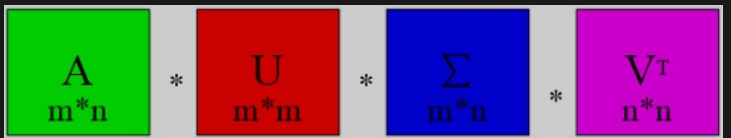  
    思考：虽说上面奇异值分解等式成立，但是如何求得左奇异向量、右奇异向量和奇异值呢？  
    答案：由上面的奇异值分解等式，我们是不知道如何拆分矩阵A的。我们可以把奇异值和特征值联系起来。
    首先，我们用矩阵A的转置乘以A，得到一个方阵，用这样的方阵进行特征分解，得到的特征值和特征向量满足下面的等式：  
    $ (A^{T}A)v_i = \lambda_i v_i $  
    这里的$v_i$就是我们要求的右奇异向量。  
    其次，我们将A和A的转置做矩阵的乘法，得到一个方阵，用这样的方阵进行特征分解，得到的特征和特征向量满足下面的等式：  
    $ (AA^{T})u_i = \lambda_i u_i $  
    这里的$u_i$就是我们要求的左奇异向量。  
    思考：上面我们说 的$A^{T}A$特征向量组成的矩阵就是我们SVD中的V矩阵，而$AA^{T}$的特征向量组成的就是我们SVD中的U矩阵，这有什么根据么?我们来证明一下，以V矩阵的证明为例。  (U为实正交矩阵）
    $$
    A = U\Sigma V^{T} \implies A^{T} = V\Sigma^{T}U^{T} \implies A^{T}A = V\Sigma^{T}U^{T}U\Sigma V^{T} = V\Sigma^{2}V^{T}
    $$
    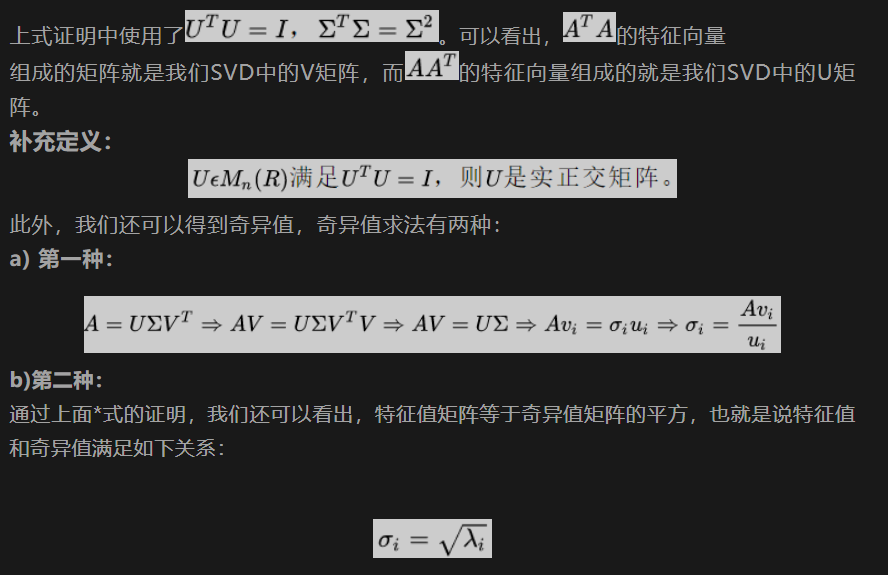  
    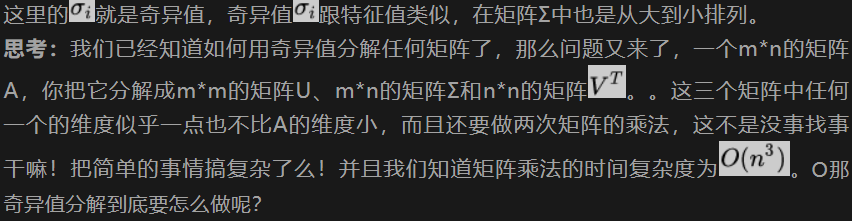  
    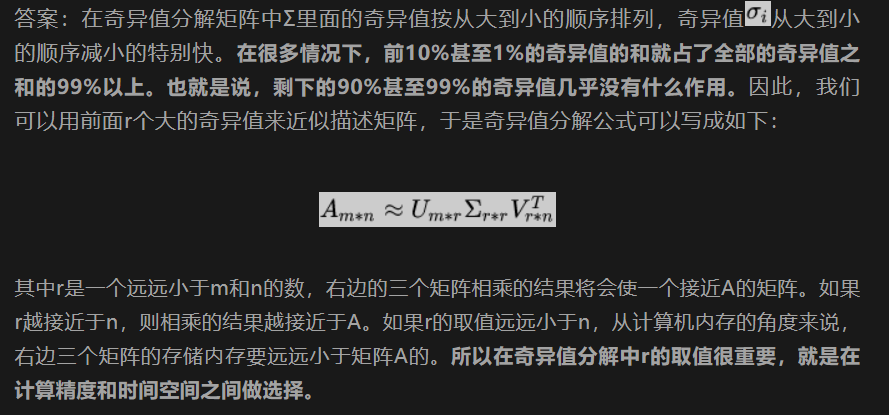  
    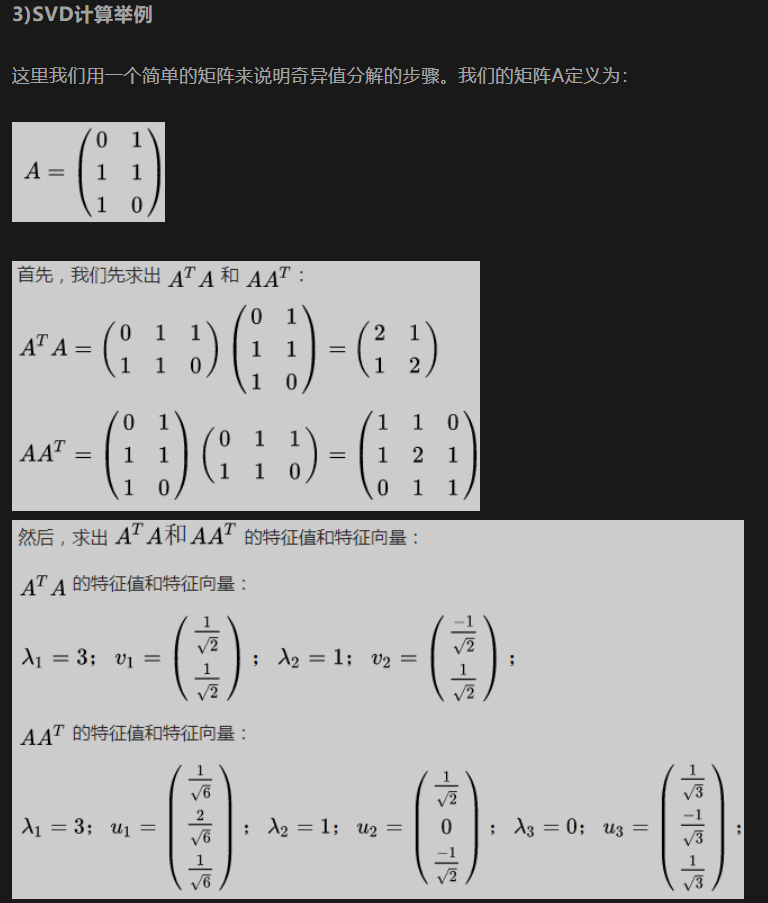  
    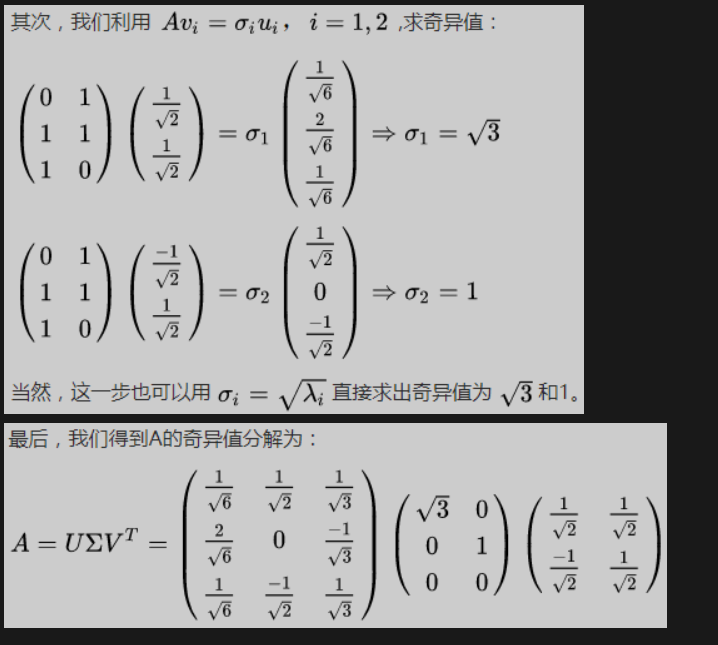  
    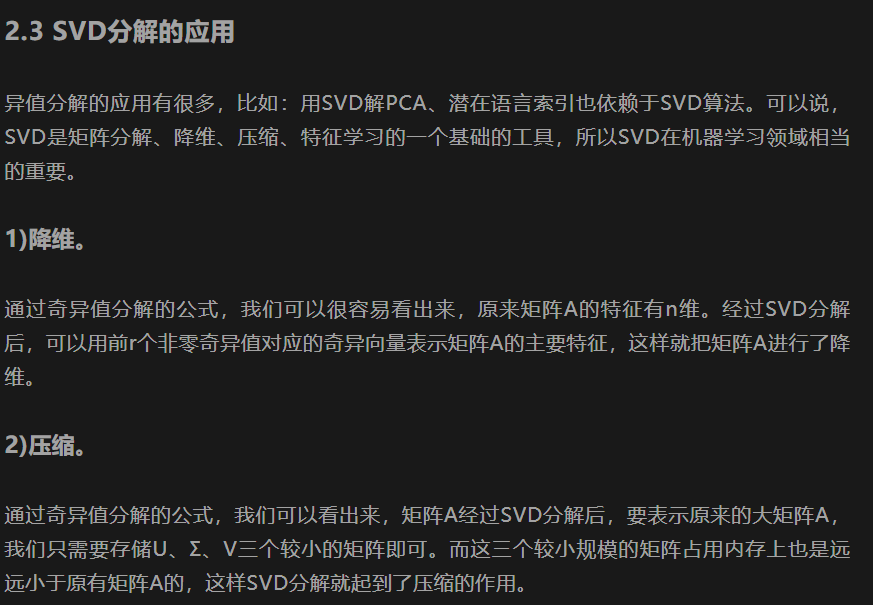